In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/home/dennis/data/predictive_maintenance/pump_data.csv', sep=';', low_memory=False , decimal=',')

In [7]:
df.shape

(574005, 55)

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
03:I3SROE       0
03:T3362        0
03:PI3061A      0
03:PI3061B      0
03:PI3061C      0
03:PD3066       0
03:T3492        0
03:T3358        0
03:TC3550       0
03:TC3550A      0
03:FV3762       0
03:FC3762       0
03:TC3730       0
03:TV3730A      0
03:TV3730B      0
03:TV3730C      0
03:T3731        0
03:P3649        0
03:P3065        0
03:LC3661       0
03:LI3661A      0
03:LI3661B      0
03:LI3661C      0
03:YV4978       0
03:FC3075.OP    0
03:FC3075       0
03:T3361        0
03:T3359        0
03:T3360        0
03:N3722_1      0
03:N3721_1      0
03:N3725_1      0
03:E3849        0
03:T3626        0
03:T3627        0
03:T3628        0
03:N3726_1      0
03:E3850        0
03:T3629        0
03:T3630        0
03:T3631        0
03:N3723_1      0
03:N3727_1      0
03:E3851        0
03:T3632        0
03:T3633        0
03:T3634        0
03:FC3195       0
03:FV3195       0
03:FC3197       0
03:FV3197       0
03:FC3199       0
03:FV3199       0
dtype: int

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Date'], axis = 1)

In [10]:
df.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
0,"890,187","77,923","3,025","3,043","3,055",No Data,"40,456","97,602","120,306",,...,"0,156","16,62","16,661","13,997","358,322",100,"362,52",100,"392,51",100
1,"890,262","77,893","3,024","3,043","3,053",No Data,"40,415","97,178","120,12",,...,"0,157","16,675","16,676","13,985","358,897",100,"362,505",100,"393,009",100
2,"890,337","77,863","3,024","3,043","3,051",No Data,"40,375","97,215","120,027",,...,"0,158","16,711","16,726","14,02","358,984",100,"362,305",100,"392,767",100
3,"890,294","77,833","3,023","3,043","3,051",No Data,"40,41","97,602","120,114",,...,"0,159","16,716","16,784","14,035","362,205",100,"361,171",100,"391,512",100
4,"890,239","77,823","3,023","3,043","3,052",No Data,"40,41","97,438","120,135",,...,"0,16","16,75","16,815","14,065","361,954",100,"360,852",100,"390,736",100


In [11]:
df = df.replace(to_replace='N_LAUF', value='0')
df = df.replace(to_replace='LAUF', value='1')
df = df.replace(to_replace='No Data', value='-1001')
df = df.replace(to_replace='Over Range', value='-1002')
df = df.replace(to_replace='I/O Timeout', value='-1003')
df = df.replace(to_replace='Calc Failed', value='-1004')
df = df.replace(to_replace='Error', value='-1005')
df = df.replace(to_replace='Configure', value='-1006')
df = df.replace(to_replace='Scan Off', value='-1007')
df = df.replace(to_replace='Comm Fail', value='-1008')
df = df.replace(to_replace='Shutdown', value='-1009')
df = df.replace(to_replace='NaN', value='-1010')
df = df.replace(to_replace='Bad Input', value='-1011')
df = df.replace(to_replace='Bad', value='-1012')

In [12]:
df.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
0,"890,187","77,923","3,025","3,043","3,055",-1001,"40,456","97,602","120,306",,...,"0,156","16,62","16,661","13,997","358,322",100,"362,52",100,"392,51",100
1,"890,262","77,893","3,024","3,043","3,053",-1001,"40,415","97,178","120,12",,...,"0,157","16,675","16,676","13,985","358,897",100,"362,505",100,"393,009",100
2,"890,337","77,863","3,024","3,043","3,051",-1001,"40,375","97,215","120,027",,...,"0,158","16,711","16,726","14,02","358,984",100,"362,305",100,"392,767",100
3,"890,294","77,833","3,023","3,043","3,051",-1001,"40,41","97,602","120,114",,...,"0,159","16,716","16,784","14,035","362,205",100,"361,171",100,"391,512",100
4,"890,239","77,823","3,023","3,043","3,052",-1001,"40,41","97,438","120,135",,...,"0,16","16,75","16,815","14,065","361,954",100,"360,852",100,"390,736",100


In [13]:
df.describe(include='all')

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
count,574005,574005,574005,574005,574005,574005,574005,574005,574005,574005,...,574005,574005,574005,574005,574005,574005,574005,574005,574005,574005
unique,133993,32895,3447,3503,3524,182,28308,38869,31785,1,...,8738,80982,80826,54544,102963,209,104141,159,106888,114
top,0,"79,401","2,713","2,713","2,741",-1001,"36,999",-1012,"119,999",,...,"0,176","-1,197","-1,197","-1,234",-1012,100,-1005,100,-1012,100
freq,6633,368,10931,9446,2584,541082,1023,3758,1179,574005,...,20038,534,530,2027,5620,253041,73,284291,2270,261731


In [14]:
df.dtypes
dataset = df.replace(',','.', regex=True)

In [15]:
dataset.head()

,03:I3SROE,03:T3362,03:PI3061A,03:PI3061B,03:PI3061C,03:PD3066,03:T3492,03:T3358,03:TC3550,03:TC3550A,...,03:E3851,03:T3632,03:T3633,03:T3634,03:FC3195,03:FV3195,03:FC3197,03:FV3197,03:FC3199,03:FV3199
0,890.187,77.923,3.025,3.043,3.055,-1001,40.456,97.602,120.306,,...,0.156,16.62,16.661,13.997,358.322,100,362.52,100,392.51,100
1,890.262,77.893,3.024,3.043,3.053,-1001,40.415,97.178,120.12,,...,0.157,16.675,16.676,13.985,358.897,100,362.505,100,393.009,100
2,890.337,77.863,3.024,3.043,3.051,-1001,40.375,97.215,120.027,,...,0.158,16.711,16.726,14.02,358.984,100,362.305,100,392.767,100
3,890.294,77.833,3.023,3.043,3.051,-1001,40.41,97.602,120.114,,...,0.159,16.716,16.784,14.035,362.205,100,361.171,100,391.512,100
4,890.239,77.823,3.023,3.043,3.052,-1001,40.41,97.438,120.135,,...,0.16,16.75,16.815,14.065,361.954,100,360.852,100,390.736,100


In [16]:
for column in dataset:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

dataset.dtypes

03:I3SROE       float64
03:T3362        float64
03:PI3061A      float64
03:PI3061B      float64
03:PI3061C      float64
03:PD3066       float64
03:T3492        float64
03:T3358        float64
03:TC3550       float64
03:TC3550A      float64
03:FV3762       float64
03:FC3762       float64
03:TC3730       float64
03:TV3730A      float64
03:TV3730B      float64
03:TV3730C      float64
03:T3731        float64
03:P3649        float64
03:P3065        float64
03:LC3661       float64
03:LI3661A      float64
03:LI3661B      float64
03:LI3661C      float64
03:YV4978       float64
03:FC3075.OP    float64
03:FC3075       float64
03:T3361        float64
03:T3359        float64
03:T3360        float64
03:N3722_1      float64
03:N3721_1      float64
03:N3725_1      float64
03:E3849        float64
03:T3626        float64
03:T3627        float64
03:T3628        float64
03:N3726_1      float64
03:E3850        float64
03:T3629        float64
03:T3630        float64
03:T3631        float64
03:N3723_1      

In [17]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

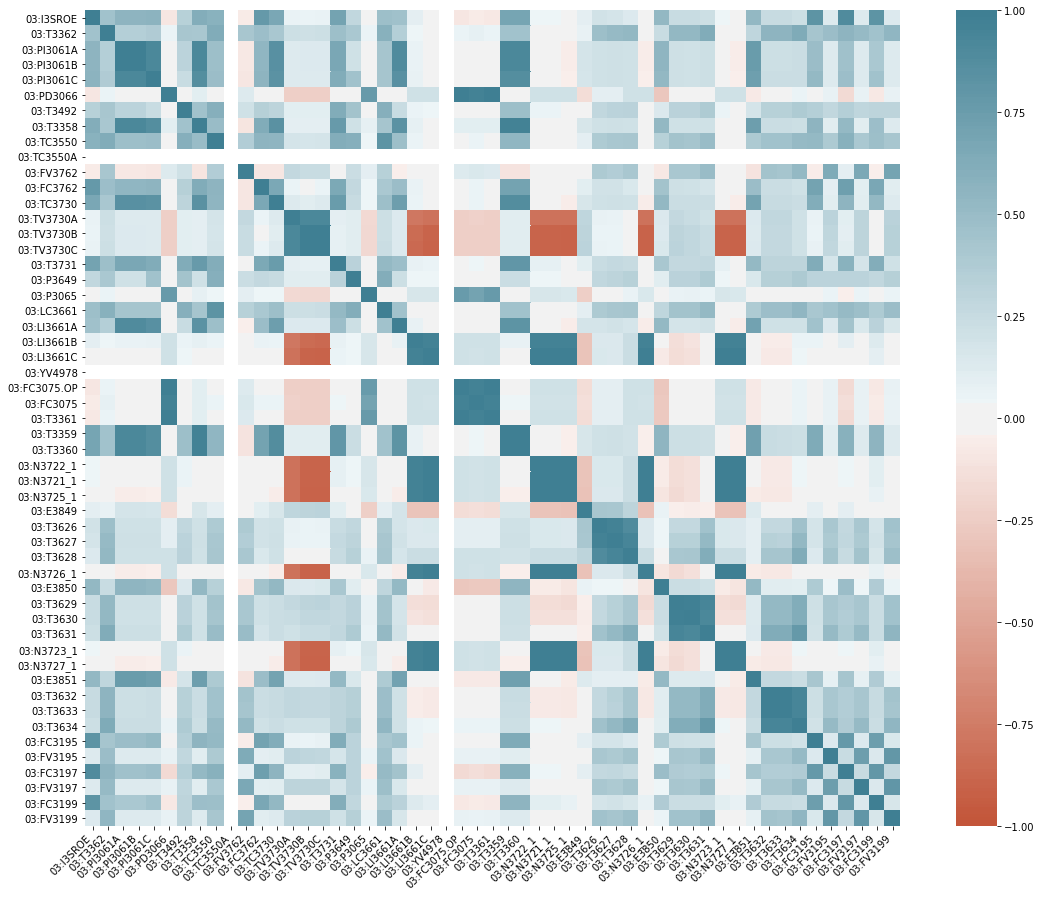

In [18]:
corr = dataset.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Feature 0 : 03:I3SROE = 0.000375
Feature 1 : 03:T3362 = 0.001224
Feature 2 : 03:PI3061A = 0.000627
Feature 3 : 03:PI3061B = 0.000317
Feature 4 : 03:PI3061C = 0.001123
Feature 5 : 03:PD3066 = 0.000900
Feature 6 : 03:T3492 = 0.000620
Feature 7 : 03:T3358 = 0.000582
Feature 8 : 03:TC3550 = 0.001795
Feature 9 : 03:TC3550A = 0.001837
Feature 10 : 03:FV3762 = 0.212992
Feature 11 : 03:FC3762 = 0.001270
Feature 12 : 03:TC3730 = 0.000378
Feature 13 : 03:TV3730A = 0.001467
Feature 14 : 03:TV3730B = 0.001030
Feature 15 : 03:TV3730C = 0.000830
Feature 16 : 03:T3731 = 0.000900
Feature 17 : 03:P3649 = 0.000566
Feature 18 : 03:P3065 = 0.001240
Feature 19 : 03:LC3661 = 0.001141
Feature 20 : 03:LI3661A = 0.001331
Feature 21 : 03:LI3661B = 0.002121
Feature 22 : 03:LI3661C = 0.000439
Feature 23 : 03:YV4978 = 0.086807
Feature 24 : 03:FC3075.OP = 0.003363
Feature 25 : 03:FC3075 = 0.001575
Feature 26 : 03:T3361 = 0.005241
Feature 27 : 03:T3359 = 0.606588
Feature 28 : 03:T3360 = 0.000340
Feature 29 : 03:N372

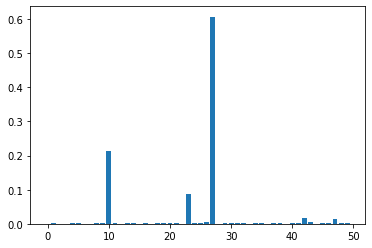

In [19]:
X, y = make_regression(n_samples=1000, n_features=50, n_informative=5, random_state=1)
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
i = 0
for col,score in zip(dataset.columns,model.feature_importances_):
    print('Feature %d : %s = %f' % (i,col,score))
    i=i+1
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()